# Predict Sea Level Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv("epa-sea-level.csv")

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


## Creating a Scatter plot to describe The Original Data

<Figure size 640x480 with 1 Axes>

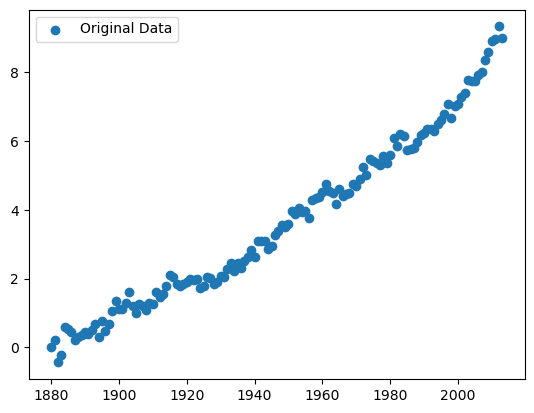

In [ ]:
x, y= df['Year'], df["CSIRO Adjusted Sea Level"]
plt.scatter(x,y,label="Original Data")
plt.legend()

In [ ]:
#Creating our first line that fits the original data
first_line = linregress(x,y)
first_line

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

In [ ]:
last_year = x.max()
df = df.append([{"Year": y} for y in range(last_year + 1, 2051)])
df

C:\Users\SharQ\AppData\Local\Temp\ipykernel_6292\1956425223.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{"Year": y} for y in range(last_year + 1, 2051)])



    Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0   1880                  0.000000          -0.952756           0.952756   
1   1881                  0.220472          -0.732283           1.173228   
2   1882                 -0.440945          -1.346457           0.464567   
3   1883                 -0.232283          -1.129921           0.665354   
4   1884                  0.590551          -0.283465           1.464567   
..   ...                       ...                ...                ...   
32  2046                       NaN                NaN                NaN   
33  2047                       NaN                NaN                NaN   
34  2048                       NaN                NaN                NaN   
35  2049                       NaN                NaN                NaN   
36  2050                       NaN                NaN                NaN   

    NOAA Adjusted Sea Level  
0                       NaN  
1                       NaN

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
32,2046,NaN,NaN,NaN,NaN
33,2047,NaN,NaN,NaN,NaN
34,2048,NaN,NaN,NaN,NaN
35,2049,NaN,NaN,NaN,NaN


## Plotting the line that fits the data

<Figure size 640x480 with 1 Axes>

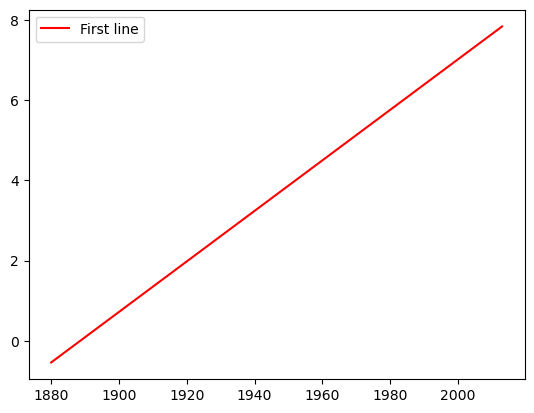

In [ ]:
plt.plot(x, first_line.intercept + first_line.slope*x, 'r', label='First line')
plt.legend()

In [ ]:
df_recent = df.loc[(df["Year"] >= 2000) & (df["Year"] <= x.max())]
bestfit = linregress(df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"])
df_recent = df_recent.append([{"Year": y} for y in range(last_year + 1, 2051)])

C:\Users\SharQ\AppData\Local\Temp\ipykernel_6292\1020971322.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recent = df_recent.append([{"Year": y} for y in range(last_year + 1, 2051)])


## Creating a second line to predict the sea level from year 2000 ---> 2050

<Figure size 640x480 with 1 Axes>

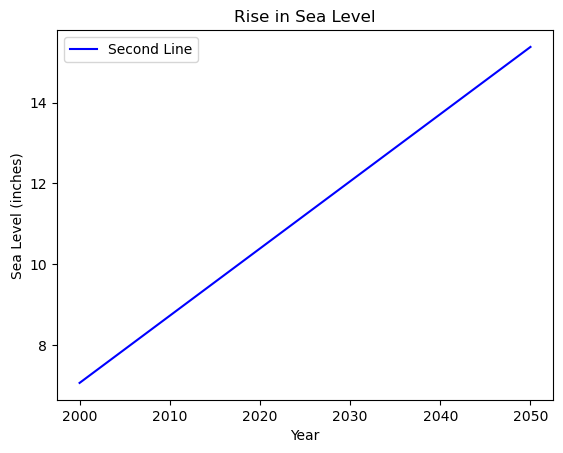

In [ ]:
plt.plot(
        df_recent["Year"],
        bestfit.intercept + bestfit.slope * df_recent["Year"],
        c="b",
        label="Second Line",
    )
# Add labels and title
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
plt.legend()